In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## **DATA PREPROCESSING**

---



In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car.csv')


print(data)


# Define a mapping from numbers to their word equivalents
number_mapping = {
    '2': 'two',
    '3': 'three',
    '4': 'four'
}

# Specify the column where you want to make the replacements
column_name = 'persons'

# Convert the column to string to handle both int and string values
data[column_name] = data[column_name].astype(str)

# Use the `replace` method to replace the values in the specified column
data[column_name] = data[column_name].replace(number_mapping)

# Save the modified DataFrame back to the same CSV file, overwriting the original data
data.to_csv('/content/drive/MyDrive/car.csv', index=False)

print("Done")

     buying cost maintainence cost  doors persons lug_boot safety decision
0          vhigh             vhigh      2       2    small    low    unacc
1          vhigh             vhigh      2       2    small    med    unacc
2          vhigh             vhigh      2       2    small   high    unacc
3          vhigh             vhigh      2       2      med    low    unacc
4          vhigh             vhigh      2       2      med    med    unacc
...          ...               ...    ...     ...      ...    ...      ...
1723         low               low  5more    more      med    med     good
1724         low               low  5more    more      med   high    vgood
1725         low               low  5more    more      big    low    unacc
1726         low               low  5more    more      big    med     good
1727         low               low  5more    more      big   high    vgood

[1728 rows x 7 columns]
Done


In [58]:
# Define a mapping from numbers to their word equivalents
number_mapping = {
    '2': 'two',
    '3': 'three',
    '4': 'four'
}

# Specify the column where you want to make the replacements
column_name = 'doors'

# Convert the column to string to handle both int and string values
data[column_name] = data[column_name].astype(str)

# Use the `replace` method to replace the values in the specified column
data[column_name] = data[column_name].replace(number_mapping)

# Save the modified DataFrame back to the same CSV file, overwriting the original data
data.to_csv('/content/drive/MyDrive/car.csv', index=False)

print("Done")
print(data)

Done
     buying cost maintainence cost  doors persons lug_boot safety decision
0          vhigh             vhigh    two     two    small    low    unacc
1          vhigh             vhigh    two     two    small    med    unacc
2          vhigh             vhigh    two     two    small   high    unacc
3          vhigh             vhigh    two     two      med    low    unacc
4          vhigh             vhigh    two     two      med    med    unacc
...          ...               ...    ...     ...      ...    ...      ...
1723         low               low  5more    more      med    med     good
1724         low               low  5more    more      med   high    vgood
1725         low               low  5more    more      big    low    unacc
1726         low               low  5more    more      big    med     good
1727         low               low  5more    more      big   high    vgood

[1728 rows x 7 columns]


In [59]:
# Handle missing values in categorical columns
for col in data.columns:
    if data[col].dtype == 'object' and data[col].isna().any():
        # Impute missing values with the mode (most frequent category)
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)

# Display the dataset after handling missing values
print("\nDataset after handling missing values:")
print(data)



Dataset after handling missing values:
     buying cost maintainence cost  doors persons lug_boot safety decision
0          vhigh             vhigh    two     two    small    low    unacc
1          vhigh             vhigh    two     two    small    med    unacc
2          vhigh             vhigh    two     two    small   high    unacc
3          vhigh             vhigh    two     two      med    low    unacc
4          vhigh             vhigh    two     two      med    med    unacc
...          ...               ...    ...     ...      ...    ...      ...
1723         low               low  5more    more      med    med     good
1724         low               low  5more    more      med   high    vgood
1725         low               low  5more    more      big    low    unacc
1726         low               low  5more    more      big    med     good
1727         low               low  5more    more      big   high    vgood

[1728 rows x 7 columns]


## **EDA**

---



In [60]:
print(data.head())

  buying cost maintainence cost doors persons lug_boot safety decision
0       vhigh             vhigh   two     two    small    low    unacc
1       vhigh             vhigh   two     two    small    med    unacc
2       vhigh             vhigh   two     two    small   high    unacc
3       vhigh             vhigh   two     two      med    low    unacc
4       vhigh             vhigh   two     two      med    med    unacc


In [6]:
print(data.describe())

       buying cost maintainence cost doors persons lug_boot safety decision
count         1728              1728  1728    1728     1728   1728     1728
unique           4                 4     4       3        3      3        4
top          vhigh             vhigh   two     two    small    low    unacc
freq           432               432   432     576      576    576     1210


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying cost        1728 non-null   object
 1   maintainence cost  1728 non-null   object
 2   doors              1728 non-null   object
 3   persons            1728 non-null   object
 4   lug_boot           1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [8]:
print(data['decision'].value_counts())

unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64


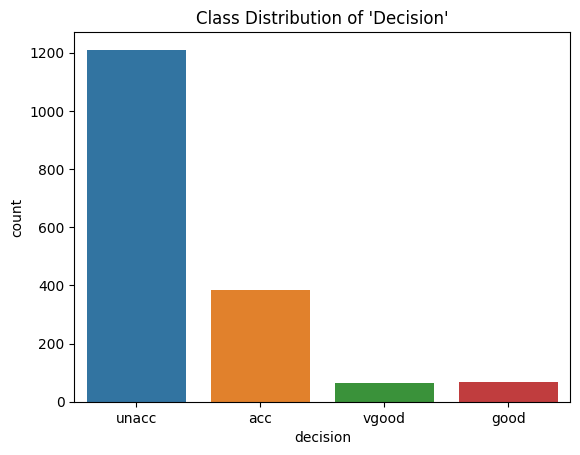

In [61]:
sns.countplot(x='decision', data=data)
plt.title("Class Distribution of 'Decision'")
plt.show()


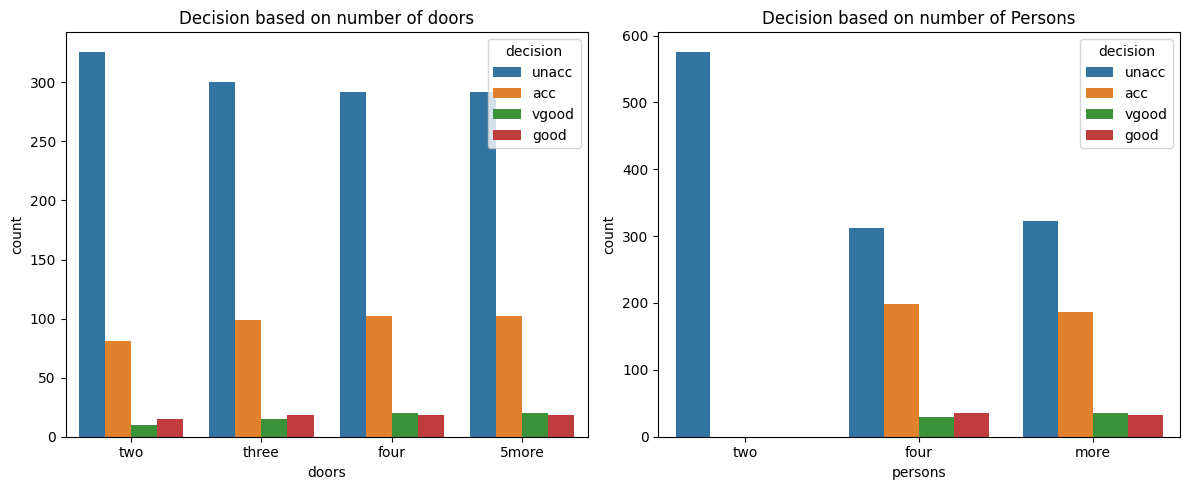

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create count plots for "doors" and "persons"
plt.figure(figsize=(12, 5))

# Count plot for "doors"
plt.subplot(1, 2, 1)
sns.countplot(x='doors', data=data, hue='decision')
plt.title("Decision based on number of doors")

# Count plot for "persons"
plt.subplot(1, 2, 2)
sns.countplot(x='persons', data=data, hue='decision')
plt.title("Decision based on number of Persons")

plt.tight_layout()
plt.show()


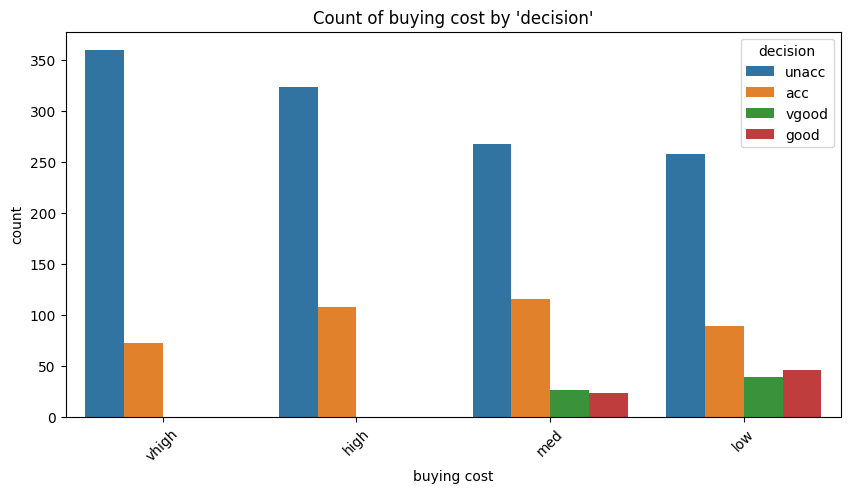

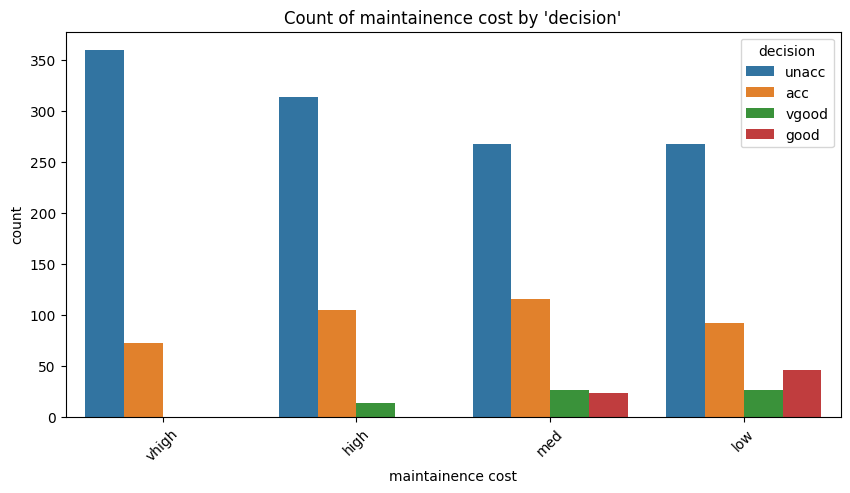

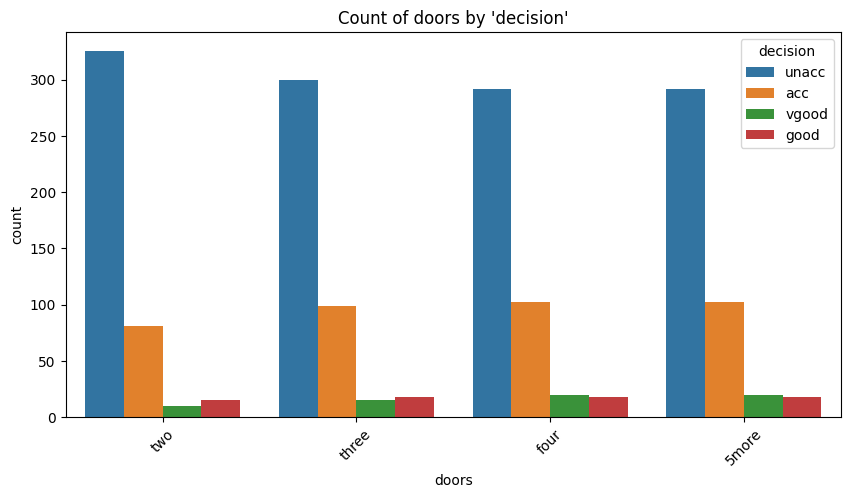

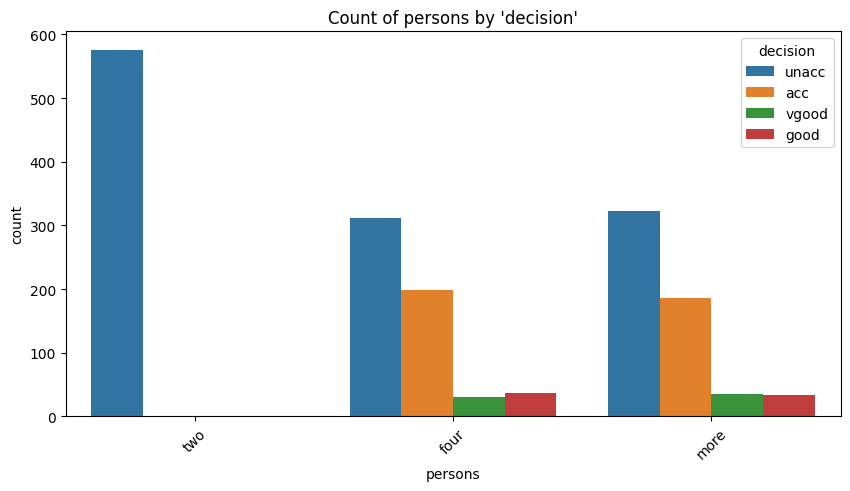

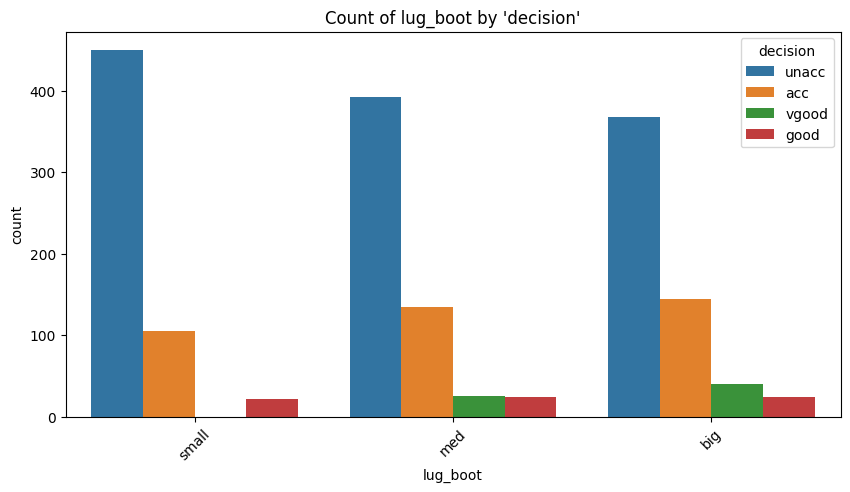

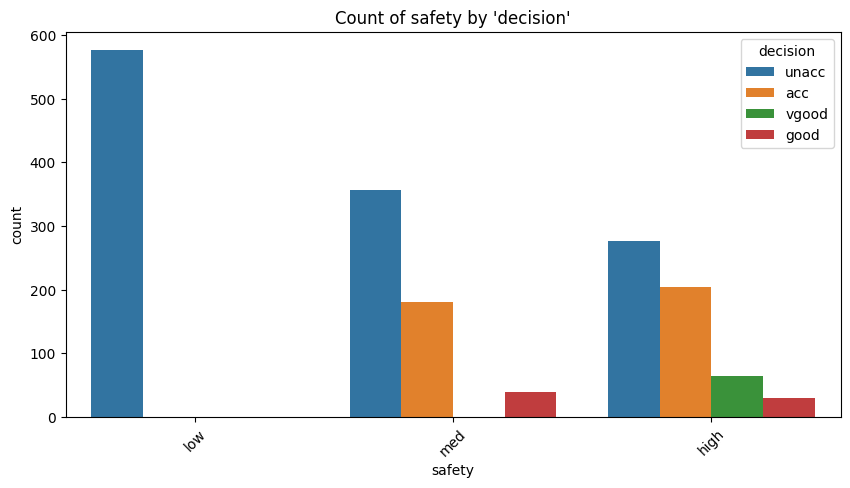

In [63]:
categorical_features = ["buying cost", "maintainence cost", "doors", "persons", "lug_boot", "safety"]

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data, hue='decision')
    plt.title(f"Count of {feature} by 'decision'")
    plt.xticks(rotation=45)
    plt.show()


Value counts for buying cost:
vhigh    432
high     432
med      432
low      432
Name: buying cost, dtype: int64



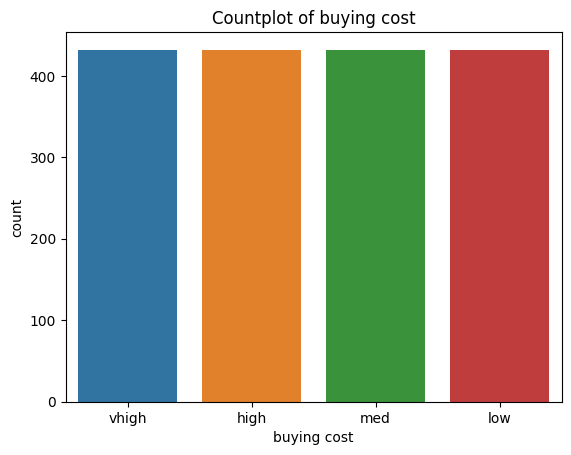

Value counts for maintainence cost:
vhigh    432
high     432
med      432
low      432
Name: maintainence cost, dtype: int64



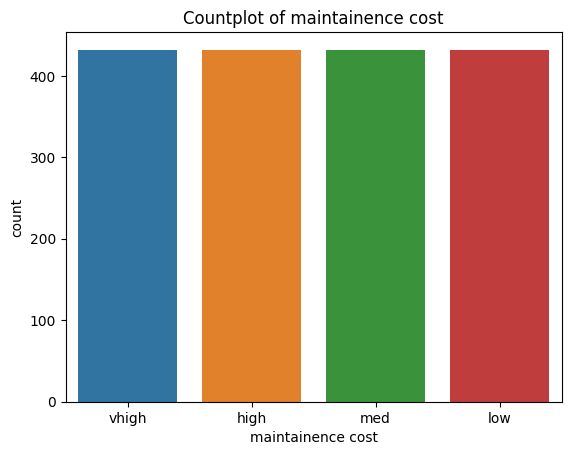

Value counts for doors:
two      432
three    432
four     432
5more    432
Name: doors, dtype: int64



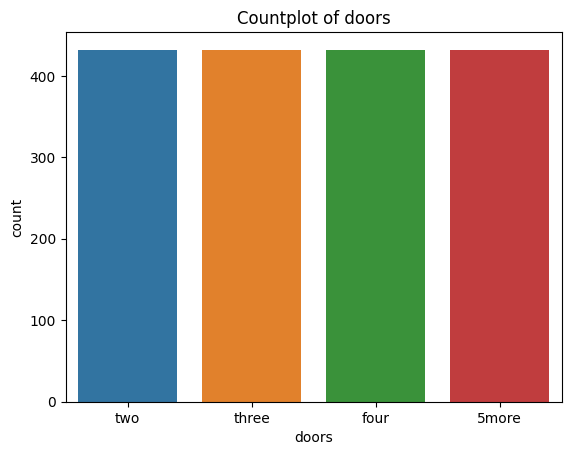

Value counts for persons:
two     576
four    576
more    576
Name: persons, dtype: int64



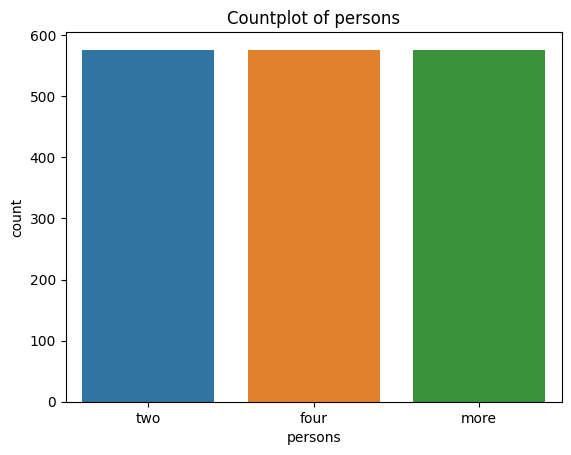

Value counts for lug_boot:
small    576
med      576
big      576
Name: lug_boot, dtype: int64



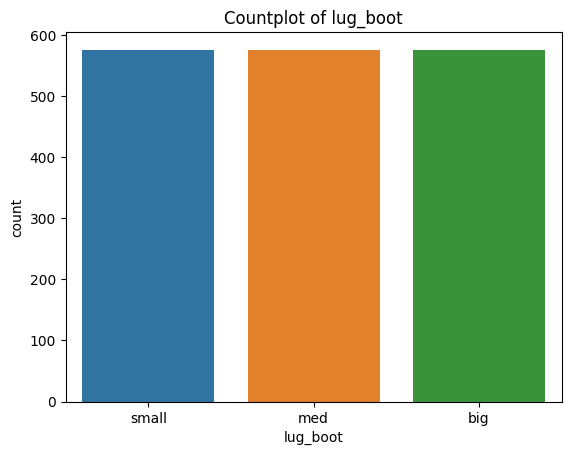

Value counts for safety:
low     576
med     576
high    576
Name: safety, dtype: int64



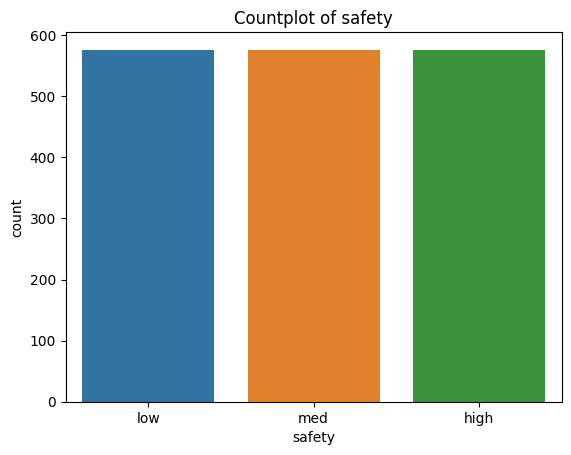

Value counts for decision:
unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: int64



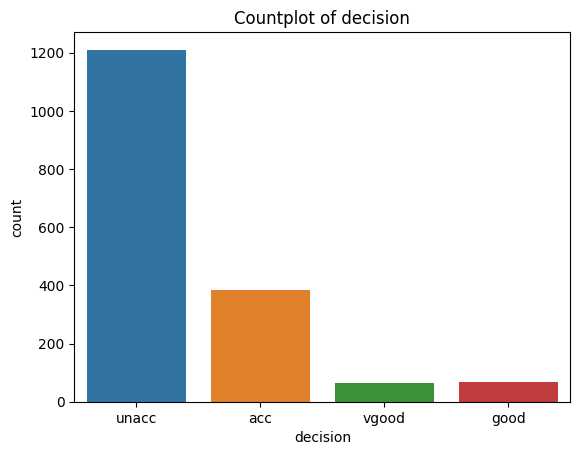

In [64]:
for col in data.columns:
    if data[col].dtype == 'object':
        value_counts = data[col].value_counts()
        print(f"Value counts for {col}:\n{value_counts}\n")
        sns.countplot(x=col, data=data)
        plt.title(f'Countplot of {col}')
        plt.show()


In [65]:
data

,buying cost,maintainence cost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## **DECISION TREE ALGORITHM**

---



In [66]:
!pip install statsmodels


In [14]:
pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = ['buying cost', 'maintainence cost', 'doors', 'persons', 'lug_boot', 'safety']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

data

,buying cost,maintainence cost,doors,persons,lug_boot,safety,decision
0,3,3,3,2,2,1,unacc
1,3,3,3,2,2,2,unacc
2,3,3,3,2,2,0,unacc
3,3,3,3,2,1,1,unacc
4,3,3,3,2,1,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,0,1,1,2,good
1724,1,1,0,1,1,0,vgood
1725,1,1,0,1,0,1,unacc
1726,1,1,0,1,0,2,good


In [68]:
# Create a copy of the DataFrame before one-hot encoding
data_copy = data.copy()

# Apply One-Hot Encoding to your categorical columns on the copy
data_copy = pd.get_dummies(data_copy, columns=categorical_cols, drop_first=True)

# Continue working with the 'data_copy' DataFrame


In [69]:
data

,buying cost,maintainence cost,doors,persons,lug_boot,safety,decision
0,3,3,3,2,2,1,unacc
1,3,3,3,2,2,2,unacc
2,3,3,3,2,2,0,unacc
3,3,3,3,2,1,1,unacc
4,3,3,3,2,1,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,0,1,1,2,good
1724,1,1,0,1,1,0,vgood
1725,1,1,0,1,0,1,unacc
1726,1,1,0,1,0,2,good


In [70]:
from sklearn.model_selection import train_test_split

X = data.drop('decision', axis=1)  # Features
y = data['decision']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')

classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.9710982658959537

Classification Report:
              precision    recall  f1-score   support

         acc       0.94      0.93      0.94       118
        good       0.75      0.95      0.84        19
       unacc       0.99      0.99      0.99       358
       vgood       1.00      0.96      0.98        24

    accuracy                           0.97       519
   macro avg       0.92      0.96      0.94       519
weighted avg       0.97      0.97      0.97       519


Confusion Matrix:
[[110   6   2   0]
 [  1  18   0   0]
 [  5   0 353   0]
 [  1   0   0  23]]


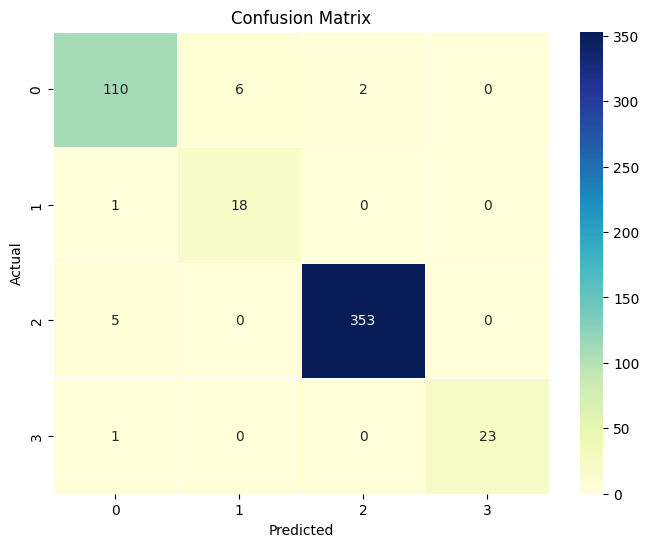

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


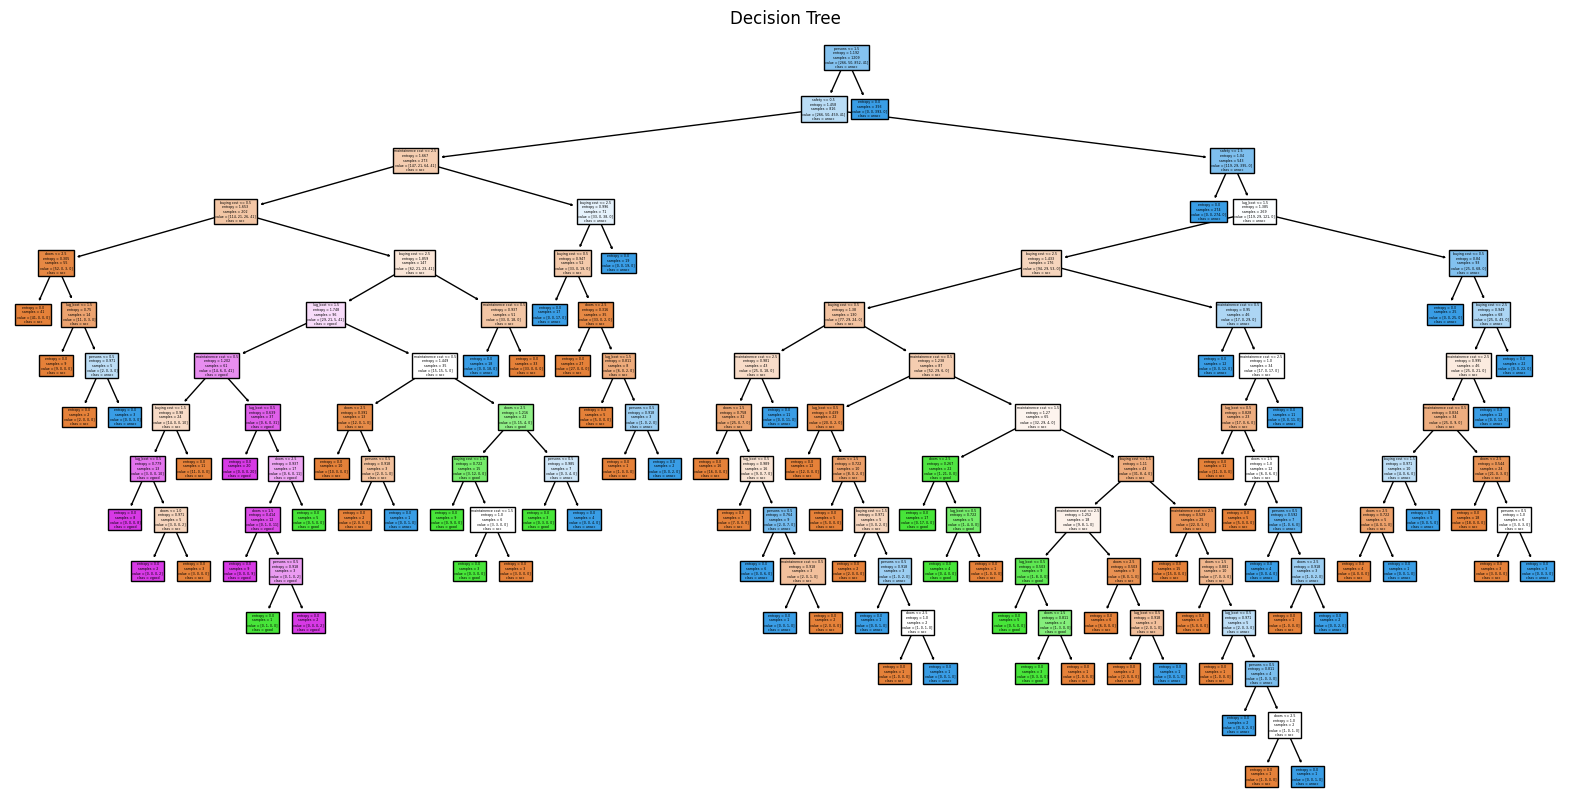

In [74]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Increase the figsize for a larger image
plt.figure(figsize=(20, 10))

# Plot the Decision Tree
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=dt_classifier.classes_)

# Set a title
plt.title('Decision Tree')

# Save the plot to an image file (e.g., 'decision_tree.png')
plt.savefig('decision_tree.png', format='png', bbox_inches='tight')


In [75]:
data

,buying cost,maintainence cost,doors,persons,lug_boot,safety,decision
0,3,3,3,2,2,1,unacc
1,3,3,3,2,2,2,unacc
2,3,3,3,2,2,0,unacc
3,3,3,3,2,1,1,unacc
4,3,3,3,2,1,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,0,1,1,2,good
1724,1,1,0,1,1,0,vgood
1725,1,1,0,1,0,1,unacc
1726,1,1,0,1,0,2,good


In [23]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [24]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    dt_classifier,
    out_file=None,
    feature_names=list(X.columns),
    class_names=dt_classifier.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render('decision_tree', view=True)


'decision_tree.pdf'

In [76]:
!pip install pydotplus
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


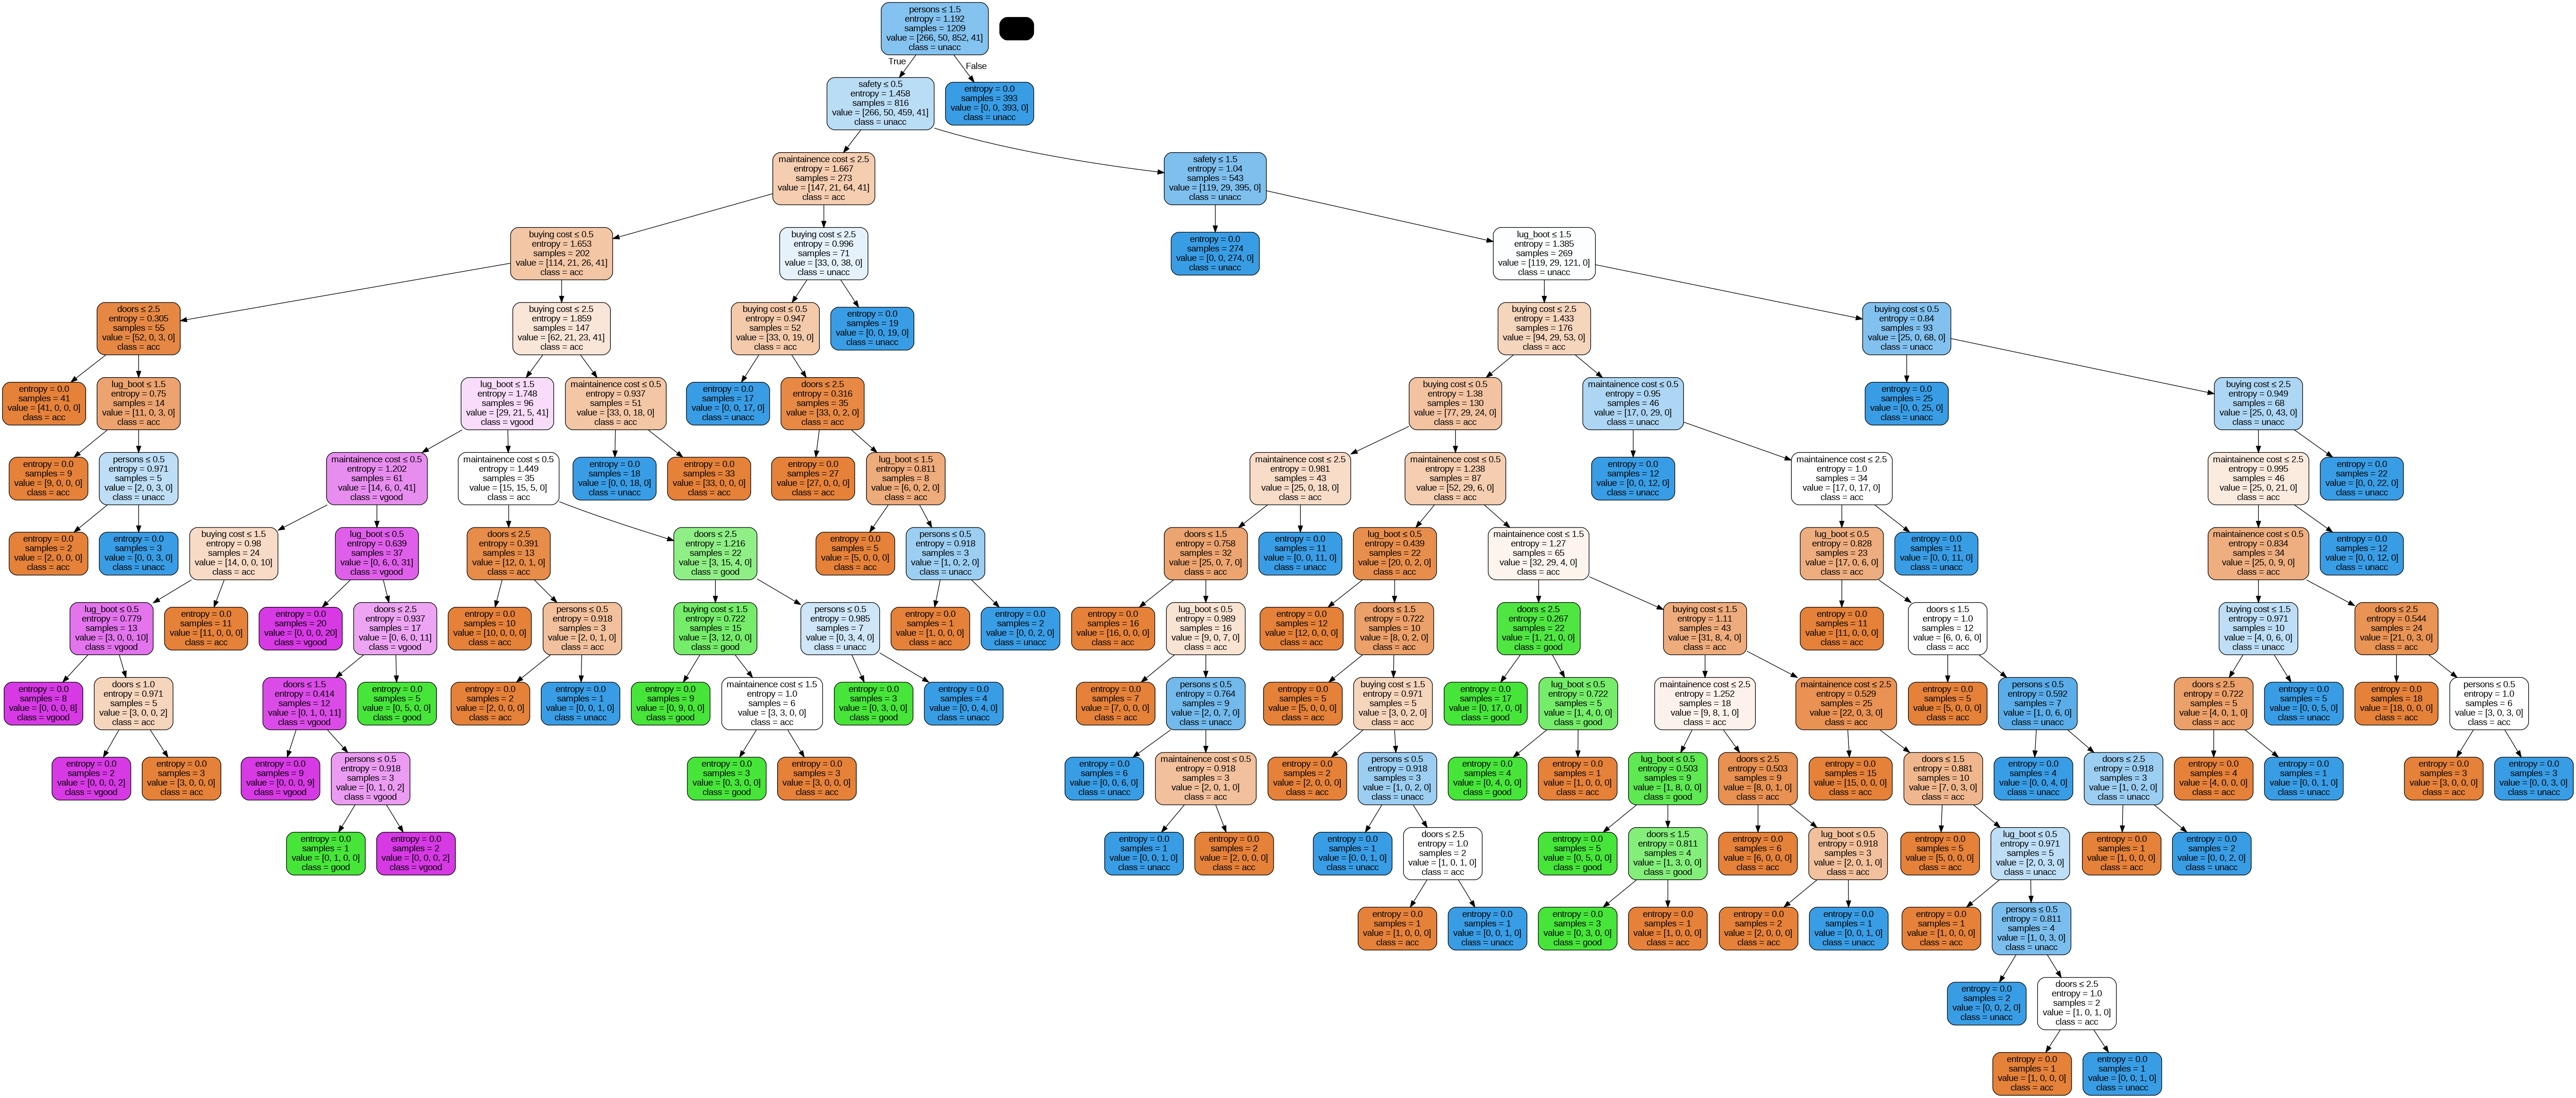

In [77]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from six import StringIO

# Define your feature columns
feature_cols = X.columns

# Define your class names
class_names = dt_classifier.classes_

dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())


## **K FOLD CROSS VALIDATION**

---



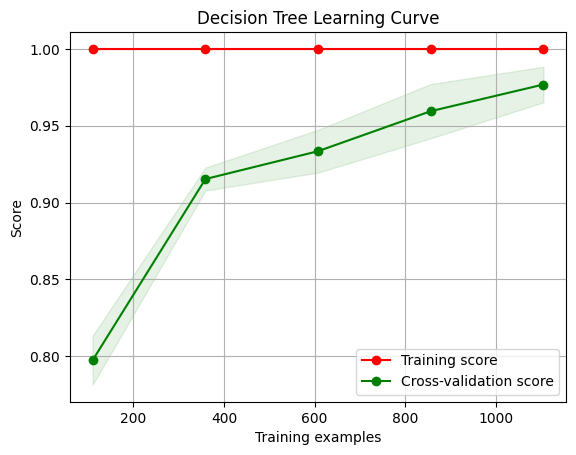

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Example usage:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
estimator = DecisionTreeClassifier()

# Plot learning curves
plot_learning_curve(estimator, "Decision Tree Learning Curve", X_train, y_train, cv=5, n_jobs=-1)

plt.show()


In [79]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Rest of your cross-validation code


In [80]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)

from sklearn.metrics import accuracy_score

for i, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    clf.fit(X_train, y_train)

    # Calculate training accuracy for this fold
    y_train_pred = clf.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate validation accuracy for this fold
    y_val_pred = clf.predict(X_val)
    validation_accuracy = accuracy_score(y_val, y_val_pred)

    print(f"Fold {i + 1}: Training Accuracy = {training_accuracy:.2f}, Validation Accuracy = {validation_accuracy:.2f}")


Fold 1: Training Accuracy = 1.00, Validation Accuracy = 0.97
Fold 2: Training Accuracy = 1.00, Validation Accuracy = 0.98
Fold 3: Training Accuracy = 1.00, Validation Accuracy = 0.98
Fold 4: Training Accuracy = 1.00, Validation Accuracy = 0.98
Fold 5: Training Accuracy = 1.00, Validation Accuracy = 0.97


In [81]:
from sklearn.model_selection import train_test_split

# Split your data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train your model on the training set (you may have already done this)
clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = clf.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


Test Accuracy: 0.97


In [82]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=dt_classifier,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores for parallelization
    verbose=1
)

# Fit the model to the data while searching for the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a new Decision Tree model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(
    criterion=grid_search.best_params_['criterion'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf']
)

# Fit the model with the training data
best_dt_classifier.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print or visualize the evaluation results
print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{classification_rep}\n')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.9710982658959537

Classification Report:
              precision    recall  f1-score   support

         acc       0.94      0.93      0.94       118
        good       0.75      0.95      0.84        19
       unacc       0.99      0.99      0.99       358
       vgood       1.00      0.96      0.98        24

    accuracy                           0.97       519
   macro avg       0.92      0.96      0.94       519
weighted avg       0.97      0.97      0.97       519


Confusion Matrix:
[[110   6   2   0]
 [  1  18   0   0]
 [  5   0 353   0]
 [  1   0   0  23]]


## **RANDOM FOREST**

---



In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
# Assuming you have categorical features in a list called 'categorical_features'
from sklearn.preprocessing import OneHotEncoder
data
# Create a OneHotEncoder
encoder = OneHotEncoder()
categorical_features = ['buying cost', 'maintainence cost', 'doors', 'persons', 'lug_boot', 'safety']

# Apply One-Hot Encoding to the categorical features
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Now, you can concatenate the one-hot encoded features with the other numeric features
from scipy.sparse import hstack

X_train_encoded = hstack((X_train_encoded, X_train.drop(categorical_features, axis=1)))
X_test_encoded = hstack((X_test_encoded, X_test.drop(categorical_features, axis=1)))

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest classifier to the training data
rf_classifier.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_encoded)


In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}\n')

# Print a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)
print(f'Random Forest Classification Report:\n{classification_rep_rf}\n')

# Create a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest Confusion Matrix:\n{conf_matrix_rf}')


Random Forest Accuracy: 0.96

Random Forest Classification Report:
              precision    recall  f1-score   support

         acc       0.90      0.94      0.92       118
        good       0.71      0.79      0.75        19
       unacc       1.00      0.99      0.99       358
       vgood       0.86      0.75      0.80        24

    accuracy                           0.96       519
   macro avg       0.87      0.87      0.87       519
weighted avg       0.96      0.96      0.96       519


Random Forest Confusion Matrix:
[[111   5   0   2]
 [  3  15   0   1]
 [  5   0 353   0]
 [  5   1   0  18]]


## **ID3 ALGORITHM**

---



In [87]:
pip install category_encoders

In [89]:
df = pd.read_csv('/content/drive/MyDrive/car.csv')


In [90]:
from sklearn.model_selection import train_test_split

X = df.drop('decision', axis=1)  # Features
y = df['decision']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
test_data=X_test
test_data['decision']=y_test
train_data=X_train
train_data['decision']=y_train

In [91]:
#DESICION TREE : ID3
import numpy as np

#CACULATING THE ENTOPY OF THE ENTIRE DATASET
totalNoRows=train_data.shape[0]
classLabels=train_data.decision.unique()
#print("Total number of classes : ", len(classLabels))
countClasses= len(classLabels)
total_entropy=0
for i in classLabels:
        class_count = train_data[train_data["decision"] == i].shape[0]
        class_entropy = - (class_count/totalNoRows)*np.log2(class_count/totalNoRows)
        total_entropy = total_entropy+class_entropy
print("Entropy of the dataset : ",total_entropy)

Entropy of the dataset :  1.192013611173186


In [92]:
def entropy_of_Features(feature,col):
      l=feature.shape[0]
      total=0
      groups =feature[col].groupby(feature['decision'])
      for name,group in groups:
              count=group.shape[0]
              entropy=-(count/l)*np.log2(count/l)
              #print(name,entropy)
              total=total+entropy
      #print(total)
      return total

In [93]:
values=[]
for i in categorical_features:
      #print("\n",i,"\n")
      groups=df.groupby(data[i])
      lt=[]
      for name,group in groups:
          #print(name)
          lt.append(entropy_of_Features(group,i))
      values.append(lt)


In [94]:
#information gain
def information_gain(feature,df,classLabels):
          feature_values=df[feature].unique()
          info=0.0
          for i in feature_values:
                   value_data = df[df[feature] ==i] #filtering rows with that feature_value
                   value_count = value_data.shape[0]
                   feature_entropy=entropy_of_Features(value_data,feature)
                   probability = value_count/totalNoRows
                   info +=  probability * feature_entropy
          return  total_entropy-info

In [95]:
information_gain("buying cost",train_data,classLabels)

0.09206889467646229

In [96]:
def highest_informative_feature(df,classLabels):
      dataX=df.columns.drop('decision')
      maxInfoGain=-1
      featureName=""
      for i in categorical_features:
          infoGain=information_gain(i,df,classLabels)
          print(i,infoGain)
          if infoGain>maxInfoGain:
            maxInfoGain=infoGain
            featureName=i
      return featureName

In [115]:
def id3(df, originaldata, features, classLabels):
    if len(np.unique(df['decision'])) <= 1:
        return np.unique(df['decision'])[0]
    elif len(df) == 0:
        return np.unique(originaldata['decision'])[np.argmax(np.unique(originaldata['decision'], return_counts=True)[1])]
    elif len(features) == 0:
        return np.unique(df['decision'])[np.argmax(np.unique(df['decision'], return_counts=True)[1])]
    else:
        best_feature = highest_informative_feature(df, classLabels)
        Dtree = {best_feature: {}}
        features = [i for i in features if i != best_feature]
        for value in np.unique(df[best_feature]):
            value_data = df.where(df[best_feature] == value).dropna()
            subtree = id3(value_data, df, features, classLabels)
            Dtree[best_feature][value] = subtree
        return Dtree


Dtree = id3(train_data,train_data, categorical_features, classLabels)
print(Dtree)

buying cost 0.09206889467646229
maintainence cost 0.07748693301275278
doors 0.008938300591400328
persons 0.20834164374829944
lug_boot 0.028025786614177317
safety 0.25654884364043185
buying cost 0.722746067594265
maintainence cost 0.699996494134324
doors 0.6597732293233913
persons 0.8169918464347058
lug_boot 0.6908631337706548
safety 0.6539860527682007
buying cost 1.0590221536944593
maintainence cost 1.0434797101697642
doors 1.003299354684993
persons 0.9990836405446024
lug_boot 1.0192026004180152
safety 0.9990836405446024
buying cost 1.1668732938411832
maintainence cost 1.192013611173186
doors 1.1677686742243096
persons 1.1668732938411832
lug_boot 1.1669009403874628
safety 1.1668732938411832
buying cost 1.149068426967026
maintainence cost 1.1723490640178367
doors 1.150999092655293
persons 1.149068426967026
lug_boot 1.1628217398558156
safety 1.149068426967026
buying cost 1.1837423125793067
maintainence cost 1.1837423125793067
doors 1.185177662036304
persons 1.1837423125793067
lug_boot 1.

In [116]:
def visualize_custom_tree(tree, feature_names, class_names):
    def display_tree(node, depth=0):
        if isinstance(node, dict):
            for feature, subtree in node.items():
                print('  ' * depth + feature + ":")
                display_tree(subtree, depth + 1)
        else:
            print('  ' * depth + "Class " + str(node))

    display_tree(tree)

# Assuming you have already created the decision tree 'Dtree' using the ID3 algorithm
# 'Dtree' is the decision tree generated from the ID3 algorithm

# Replace 'feature_names' and 'class_names' with the appropriate variables from your dataset
feature_names = df.columns.drop('decision').tolist()
class_names = np.unique(df['decision']).tolist()

# Visualize the decision tree
visualize_custom_tree(Dtree, feature_names, class_names)


safety:
  high:
    persons:
      four:
        buying cost:
          high:
            maintainence cost:
              high:
                Class acc
              low:
                Class acc
              med:
                Class acc
              vhigh:
                Class unacc
          low:
            maintainence cost:
              high:
                lug_boot:
                  big:
                    Class vgood
                  med:
                    doors:
                      5more:
                        Class vgood
                      three:
                        Class acc
                      two:
                        Class acc
                  small:
                    Class acc
              low:
                lug_boot:
                  big:
                    Class vgood
                  med:
                    doors:
                      5more:
                        Class vgood
                      four:
                      

In [117]:
!pip install pydotplus

In [118]:
def predict(query, tree, default=1):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result

In [119]:
y_pred=[]
for index, row in test_data.iterrows():
    query = row.drop('decision').to_dict()  # Convert the row to a dictionary query
    prediction = predict(query, Dtree)  # Apply the prediction function to the query
    print(f"Prediction for row {index}: {prediction}")
    y_pred.append(prediction)

Prediction for row 599: unacc
Prediction for row 1201: good
Prediction for row 628: unacc
Prediction for row 1498: acc
Prediction for row 1263: unacc
Prediction for row 931: 1
Prediction for row 23: unacc
Prediction for row 844: unacc
Prediction for row 964: acc
Prediction for row 764: unacc
Prediction for row 1481: 1
Prediction for row 1172: vgood
Prediction for row 344: acc
Prediction for row 413: unacc
Prediction for row 494: unacc
Prediction for row 298: unacc
Prediction for row 529: unacc
Prediction for row 1649: unacc
Prediction for row 1190: unacc
Prediction for row 1507: acc
Prediction for row 548: unacc
Prediction for row 371: acc
Prediction for row 1340: acc
Prediction for row 736: unacc
Prediction for row 254: acc
Prediction for row 829: unacc
Prediction for row 479: unacc
Prediction for row 297: unacc
Prediction for row 1193: unacc
Prediction for row 602: unacc
Prediction for row 940: unacc
Prediction for row 352: unacc
Prediction for row 173: unacc
Prediction for row 1675:

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , classification_report, confusion_matrix

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

evaluate_model(y_test,y_pred)

Accuracy: 0.88
Precision: 0.93
Recall: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
df


,buying cost,maintainence cost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## **PATE ALGORITHM**

---



In [38]:
pip install numpy scikit-learn torch


In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/car.csv')

# Perform label encoding for categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['buying cost', 'maintainence cost', 'doors', 'persons', 'lug_boot', 'safety', 'decision']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


In [40]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = data.drop(columns=['decision'])
y = data['decision']

# Split your data into public and private portions
X_public, X_private, y_public, y_private = train_test_split(X, y, test_size=0.5, random_state=42)


In [41]:
from sklearn.tree import DecisionTreeClassifier

# Train teacher models
teacher_bob = DecisionTreeClassifier(max_depth=5)
teacher_bob.fit(X_public, y_public)

teacher_alice = DecisionTreeClassifier(max_depth=5)
teacher_alice.fit(X_public, y_public)


DecisionTreeClassifier(max_depth=5)

In [42]:
import numpy as np

# Collect teacher predictions
predictions_bob = teacher_bob.predict(X_private)
predictions_alice = teacher_alice.predict(X_private)

# Add Laplace noise to teacher predictions
epsilon = 1.0  # Adjust for desired privacy level
noisy_predictions_bob = predictions_bob + np.random.laplace(scale=1.0 / epsilon, size=len(predictions_bob))
noisy_predictions_alice = predictions_alice + np.random.laplace(scale=1.0 / epsilon, size=len(predictions_alice))


In [43]:
import numpy as np

# Collect teacher predictions
predictions_bob = teacher_bob.predict(X_private)
predictions_alice = teacher_alice.predict(X_private)

# Add Laplace noise to teacher predictions
epsilon = 1.0  # Adjust for desired privacy level
noisy_predictions_bob = predictions_bob + np.random.laplace(scale=1.0 / epsilon, size=len(predictions_bob))
noisy_predictions_alice = predictions_alice + np.random.laplace(scale=1.0 / epsilon, size=len(predictions_alice))

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the student model
student_model = DecisionTreeClassifier(max_depth=5)
student_model.fit(np.vstack([noisy_predictions_bob, noisy_predictions_alice]).T, y_public)

# Generate predictions from the student model
student_predictions = student_model.predict(np.vstack([noisy_predictions_bob, noisy_predictions_alice]).T)

# Evaluate the student model's accuracy
accuracy = accuracy_score(y_public, student_predictions)
print("Student Model Accuracy: {:.2f}%".format(accuracy * 100))


Student Model Accuracy: 71.06%
